# Explore dataset

In [4]:
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy
import pandas as pd
import scipy.stats as stats
import scipy.sparse as sparse
import copy
import time
import warnings 
from scipy import integrate
import seaborn as sns
from numpy import sqrt, cosh, tanh, pi, exp
warnings.simplefilter('ignore')

import scipy.io as sio
import os
from tqdm.auto import tqdm

# using functions from PyalData
from pyaldata import *

## Get the data and convert to pandas df

In [5]:
'''
Insert path and filename 
'''

path = '/Users/Daphne/Data/'  
fname = 'Chewie_CO_VR_2016-10-06.mat' 
mat = scipy.io.loadmat(path + fname) 

In [6]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'trial_data'])

In [7]:
mat['__header__']

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Mar 11 17:00:03 2017'

In [8]:
mat['__globals__']

[]

In [9]:
mat['__version__']

'1.0'

In [10]:
'''
Convert matlab file to df
'''
df = mat2dataframe(path+fname, shift_idx_fields=True)

In [11]:
df.shape # num trials x info

(774, 24)

In [12]:
df.head()

,monkey,date,task,target_direction,trial_id,result,bin_size,perturbation,perturbation_info,epoch,...,idx_peak_speed,idx_trial_end,pos,vel,acc,force,M1_spikes,M1_unit_guide,PMd_spikes,PMd_unit_guide
0,Chewie,10-06-2016,CO,-2.356194,1,R,0.01,VR,-0.52,BL,...,363,436,"[[-5.399950889827338, -25.11058978269873], [-5...","[[4.615264447089089, -3.6781866137904946], [4....","[[34.913180411358354, -17.92603186704403], [13...","[[0.3854857746577438, -0.18448026169727955], [...","[[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
1,Chewie,10-06-2016,CO,1.570796,2,R,0.01,VR,-0.52,BL,...,356,447,"[[-5.194667657852522, -35.190944353130526], [-...","[[2.3921738136280783, 2.833707639241631], [2.7...","[[31.99226756476989, 80.42711312188004], [34.1...","[[0.1778157378731141, 0.12542049016429982], [0...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
2,Chewie,10-06-2016,CO,0.785398,3,R,0.01,VR,-0.52,BL,...,414,483,"[[0.35267826312911055, -22.923278550949004], [...","[[0.5017102009485903, -3.146994710197926], [0....","[[-7.180978950112355, -35.21789901845524], [3....","[[0.2833417683274762, -0.1285513884878812], [0...","[[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
3,Chewie,10-06-2016,CO,3.141593,4,R,0.01,VR,-0.52,BL,...,397,458,"[[5.072834875801728, -24.89410841851521], [5.0...","[[-1.3275097541588876, -3.5308863978243985], [...","[[-6.932033881542791, 0.17982626642873387], [-...","[[0.08675043530985374, 0.03658922221440793], [...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."
4,Chewie,10-06-2016,CO,-1.570796,5,R,0.01,VR,-0.52,BL,...,301,362,"[[-8.194254800472459, -30.26359832666607], [-8...","[[1.8501123719868446, 0.8394848146862552], [2....","[[48.123169514922175, -9.081942493745938], [58...","[[0.2054977133197953, -0.12485484173352068], [...","[[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,...","[[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...","[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[1, 1], [1, 2], [2, 1], [2, 2], [3, 1], [3, 2..."


In [13]:
# CO is the only task there is so we can use the 
df['task'].unique()

array(['CO'], dtype=object)

In [14]:
df.columns

Index(['monkey', 'date', 'task', 'target_direction', 'trial_id', 'result',
       'bin_size', 'perturbation', 'perturbation_info', 'epoch',
       'idx_trial_start', 'idx_target_on', 'idx_go_cue', 'idx_movement_on',
       'idx_peak_speed', 'idx_trial_end', 'pos', 'vel', 'acc', 'force',
       'M1_spikes', 'M1_unit_guide', 'PMd_spikes', 'PMd_unit_guide'],
      dtype='object')

In [15]:
df[['idx_target_on', 'idx_go_cue', 'idx_trial_end']]

,idx_target_on,idx_go_cue,idx_trial_end
0,186,288,436
1,199,325,447
2,300,367,483
3,244,344,458
4,126,246,362
...,...,...,...
769,129,249,374
770,177,269,388
771,188,317,396
772,197,305,423


In [16]:
df['M1_spikes']

0      [[0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,...
1      [[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,...
2      [[0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,...
3      [[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
4      [[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,...
                             ...                        
769    [[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,...
770    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
771    [[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
772    [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,...
773    [[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
Name: M1_spikes, Length: 774, dtype: object

In [17]:
df['M1_spikes'].shape # trials by spikes 

(774,)

In [18]:
df['M1_spikes'][0]

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0]], dtype=uint8)

In [19]:
df['M1_spikes'][0].shape # one trail: spike trains by neurons / electrodes ?

(447, 63)

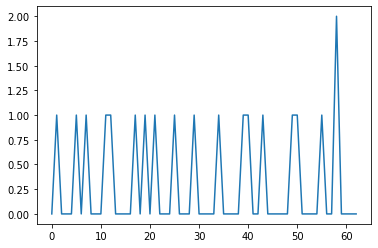

In [20]:
plt.plot(df['M1_spikes'][0][0]);

In [21]:
df['M1_spikes'][0][0].shape

(63,)

In [22]:
df['M1_unit_guide']

0      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
1      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
2      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
3      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
4      [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
                             ...                        
769    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
770    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
771    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
772    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
773    [[5, 1], [5, 2], [5, 3], [5, 4], [9, 1], [9, 2...
Name: M1_unit_guide, Length: 774, dtype: object

In [23]:
df['M1_unit_guide'][0].shape

(63, 2)

In [24]:
df['M1_unit_guide'][0][::10]

array([[ 5,  1],
       [13,  3],
       [26,  1],
       [40,  2],
       [50,  2],
       [62,  1],
       [92,  3]], dtype=uint8)

In [25]:
df.head()

trial_data = df

In [71]:
trial_data['bin_size'].unique()

array([0.01])

In [27]:
# iterate through trials (rows wise) in one session
#for idx, td in trial_data.iterrows():


In [28]:
row = trial_data.iloc[0, :]

In [29]:
row

monkey                                                          Chewie
date                                                        10-06-2016
task                                                                CO
target_direction                                              -2.35619
trial_id                                                             1
result                                                               R
bin_size                                                          0.01
perturbation                                                        VR
perturbation_info                                                -0.52
epoch                                                               BL
idx_trial_start                                                     10
idx_target_on                                                      186
idx_go_cue                                                         288
idx_movement_on                                                    349
idx_pe

In [30]:
row.dropna()

monkey                                                          Chewie
date                                                        10-06-2016
task                                                                CO
target_direction                                              -2.35619
trial_id                                                             1
result                                                               R
bin_size                                                          0.01
perturbation                                                        VR
perturbation_info                                                -0.52
epoch                                                               BL
idx_trial_start                                                     10
idx_target_on                                                      186
idx_go_cue                                                         288
idx_movement_on                                                    349
idx_pe

In [68]:
td = trial_data.iloc[0, :]['bin_size']

In [69]:
td

0.01